# Generating CAPTCHAS with Python

The purpose of this notebook is to generate bunch of captchas to train a neural network on it.

I created a seperate python environment as I couldn't find how to work with captcha library in anaconda. Also, it's more convinient to work in seperate environments because I needed to downgrade PIL library.

In [1]:
from captcha.image import ImageCaptcha   # for generating captchas
import matplotlib.pyplot as plt   # for plotting images and saving
import string   # for easy access on all characters
import random   # for randomizing characters
import numpy as np   # for converting image into an array
from PIL import Image   # for image objects
from tqdm import tqdm   # for visualising progress bar

Resizing images is needed because characters are the same size regardless the size of the image. So I generate image with a good proportion of character size and iamge size , then resize the image.

In [2]:
# list of all digits and English uppercase letters
characters = string.digits + string.ascii_uppercase 

In [3]:
# captcha generating function. Returns image and characters of the image.

def generate(width,height,num_char):
    # width and height are just the dimesnions of the image
    # num_char is the number of random characters in image
       
    # joins together random characters
    rand_str = ''.join(random.sample(characters,num_char))
    
    # generates the captcha using captcha library
    generator = ImageCaptcha(width=width, height=height)
    image = generator.generate_image(rand_str)
    
    return (image,rand_str)

Here is an example of a random captcha.

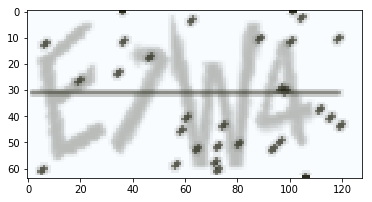

E1W4


In [4]:
img, char = generate(128,64,4)
plt.imshow(img)
plt.show()
print(char)

Here is the code to generate the desired number of images and save them into a folder with a text documents which contains the corrseponding characters of images. For the neural network I chose to generate images of width 128 and height 64 then resize them to 64, 32 correspondingly. 64 ,32 image is quite a normal size though on my computer it took abut 15 hours to train a network with about 95% accuracy. 

In [5]:
# change save_dir to a desired directory
save_dir = r'D:\test\img'

# number of images to generate
num_images = 4   

# list of labels for the images
labels = []
for i in tqdm(range(num_images)):
    img, char = generate(128,64,4)   # generate image and corresponding label
    img_resized = img.resize((64,32),Image.ANTIALIAS)   # Image.ANTIALIAS is a high-quality downsampling filter
    plt.imsave(save_dir+str(i)+".jpg",np.array(img_resized))   # saves the image as a .jpg file
    labels.append(char)
    
# save labels on a txt file
with open(save_dir + 'labels.txt','w') as f:
    for lb in labels:
        f.write('%s\n' % lb)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 181.66it/s]


For the neural network I generated 1,000,000 captchas for training and 100,000 for testing and saved them in diferent folders to not mix them up.

Most part of captcha generation code was taken from this post https://mathematica.stackexchange.com/questions/143691/crack-captcha-using-deep-learning on StackExchange. It is a great post to get more info on captcha cracking neural networks.
